In [68]:
import networkx as nx 
import matplotlib.pyplot as plt
import random 
import numpy as np
import pandas as pd

### Idea: 
Create simple graphs of nodes (according to the misinfo research) and assign probabilities to each node that 
contains their belief in a piece of information. 

By defining a "source" node, or a node where a piece of information first gets injected into (eg. the first person
to read an article), we can propogate the information throughout the network. In this way, we can try and 
understand how information can spread throughout different types of networks. 

Extensions of this idea would be: 
1. To include the probability that a person will share a piece information, separating the "probability to share"
   from their "probability of belief". 
2. We can include multiple sources of initial information, as well as competing sources of information that can 
   affect the probability of belief. 
3. We can also link different types of simple graphs to each other, creating larger networks with different shapes 
   and sizes. 
4. We can also have two edges between two distinct nodes so that both nodes may affect each other. 

What is important to this is to have a proper updating function for the belief probabilities in each individual, as
well as realistic starting states. Furthermore, will need to define proper directed graphs and be able to easily 
create large graphs. 

One thing to look out for is how these probabilities cascade down a chain, we can verify this with the chain network or even the cycle network.

### Need: 
1. Probabilities (beliefs) assigned to nodes so that we can simulate how nodes update their beliefs. 
2. Methods to create simple graphs
3. Updating function for beliefs -- Bayesian updating function is the benchmark. 
    - https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/readings/MIT18_05S14_Reading11.pdf
4. Method to create large graphs (need to figure out proper shapes) 
    - large spiderweb graph where there is one central node with degree d and each of its neighbors has 
      degree d-1, with d-2 of their edges going to distinct nodes that are not the source? With each step 
      away from the source, we can iteratively cut down the degrees until d = 1. 
    - large versions of simple graphs. 



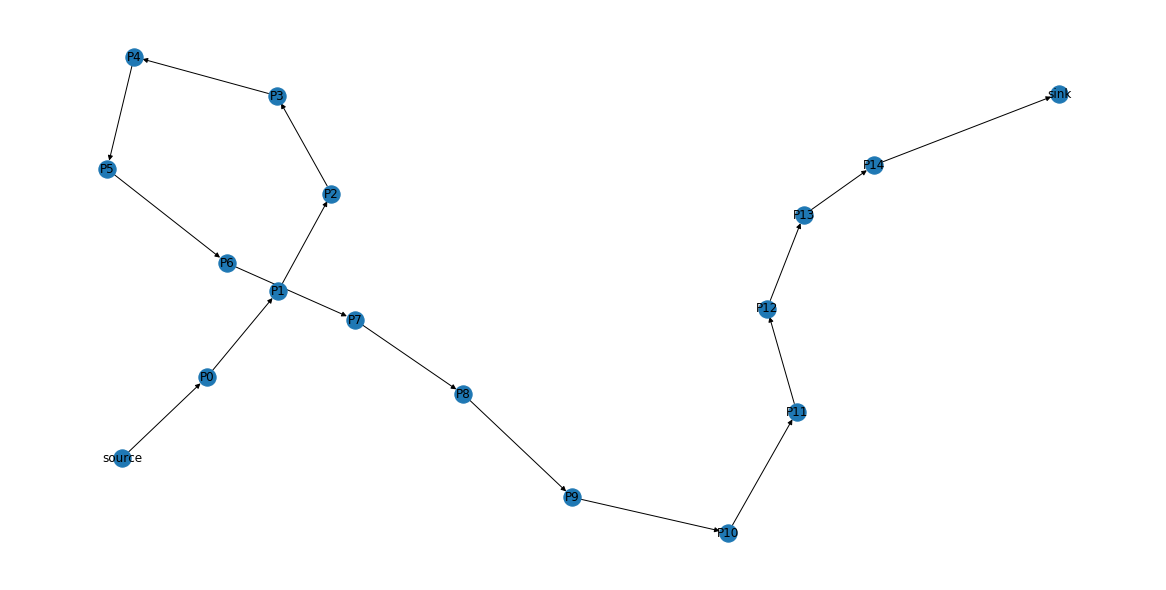

In [146]:
# directed graph in chain fashion from source node to sink node. 
# define a dummy source node and dummy end node
# num_nodes in the number of middle nodes in the chain, will initialize each one to prob of 0.5. 

def chain(g, num_nodes): 
    
    # define nodes
    source_node = ("source", {'prob': 0, 'belief': True})
    sink_node = ("sink", {'prob': 0, 'belief': False}) 
    middle_nodes = [("P" + str(i), {'prob' : 0.05, 'belief': False}) for i in range(num_nodes)]
    
    # add nodes to graph 
    g.add_nodes_from([source_node, sink_node]) 
    g.add_nodes_from(middle_nodes)
    
    # define edge from source to first node
    g.add_edge(source_node[0], middle_nodes[0][0])
    
    # define edge from last node to sink 
    g.add_edge(middle_nodes[-1][0], sink_node[0])
    
    # define all middle edges
    for i in range(num_nodes - 1): 
        g.add_edge(middle_nodes[i][0], middle_nodes[i+1][0])
    
    return g 

g = chain(nx.DiGraph(), 15)
plt.figure(figsize = (16, 8))
nx.draw(g, with_labels = True)

In [151]:
def propogate_probabilites(g): 
    curr_node = 'source'
    next_node = list(g.successors(curr_node))[0]
    
    while (next_node is not None and next_node != 'sink'): 
        # first check if the information is believed, otherwise break the chain
        if random.uniform(0, 1) > g.nodes[curr_node]['prob']: 
            g.nodes[curr_node]['belief'] = True 
            curr_node = next_node 
            next_node = list(g.successors(curr_node))[0]
        else: 
            next_node = None  

    return g 
        
g = propogate_probabilites(g)

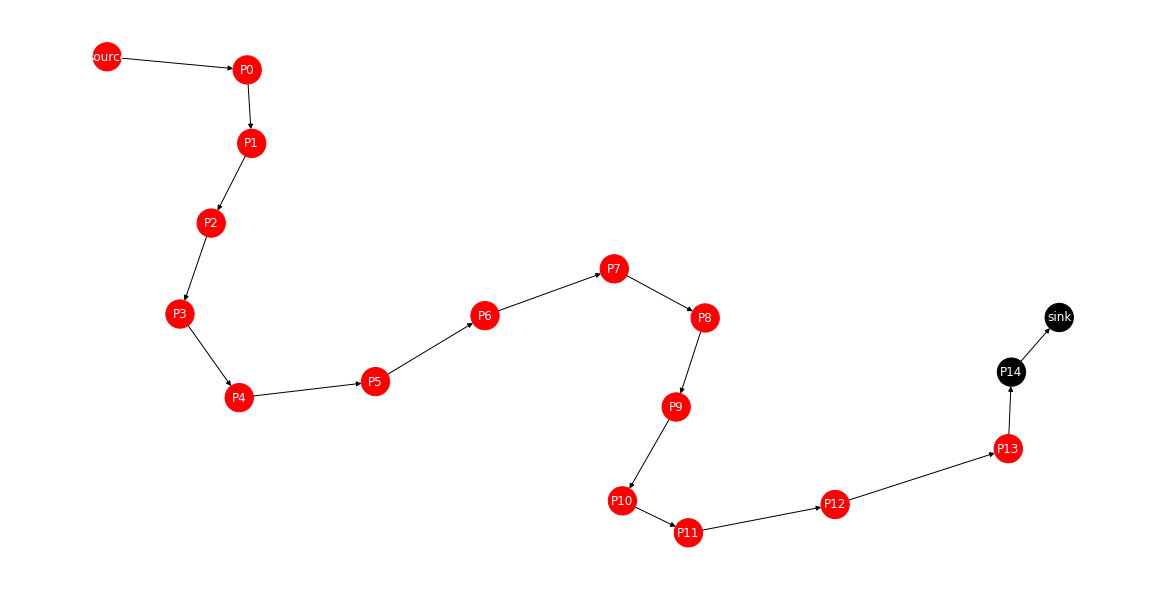

In [155]:
# draw belief states 
def draw_belief_states(g): 
    color_state_map = {True: 'red', False: 'black'}
    plt.figure(figsize=(16, 8))
    nx.draw(g,  
            with_labels=True, 
            node_color=[color_state_map[node[1]['belief']] 
                        for node in g.nodes(data=True)], 
            node_size=800,
           font_color='white')
    plt.show()
    
draw_belief_states(g)

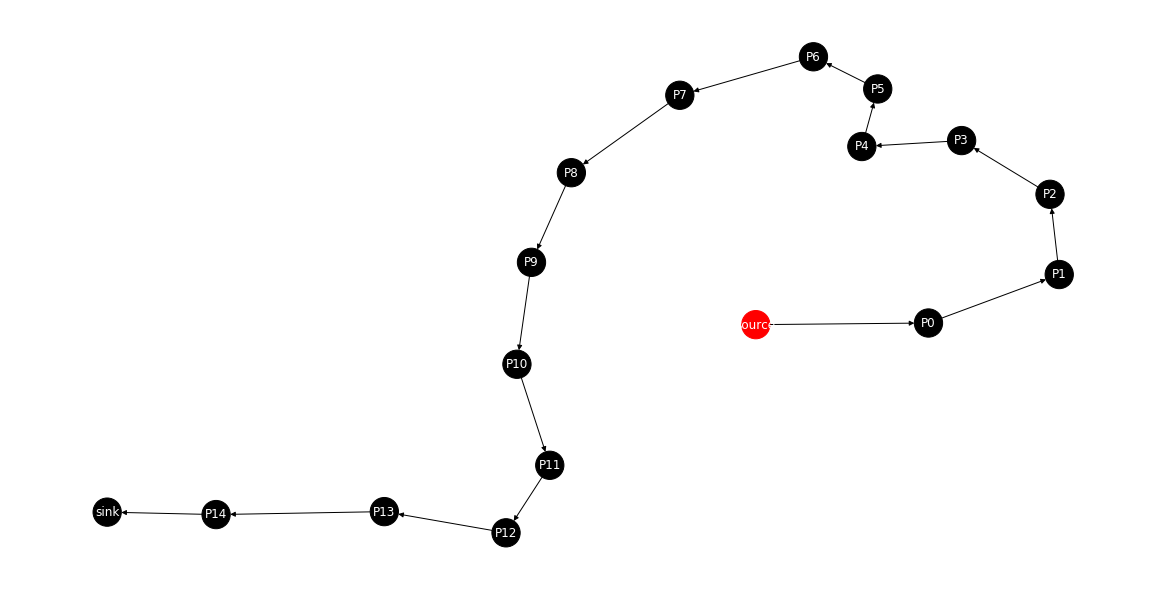

In [157]:
def reset_beliefs(g): 
    for node in g.nodes: 
        if node == 'source': 
            g.nodes[node]['belief'] = True
        else:
            g.nodes[node]['belief'] = False
    
    return g

g = reset_beliefs(g)
draw_belief_states(g)